In [1]:
### required imports

from __future__ import division, print_function

import os
import numpy as np
import networkx as nx
from itertools import combinations
from skimage.morphology import skeletonize
from skimage.segmentation import find_boundaries

import distance_matrix_functions as dmf

import stackview
import matplotlib.pyplot as plt
%matplotlib inline

# Generate example dataset:

In [2]:
container_image = np.zeros((200, 200, 200), dtype=int)
n_nuclei = 300

stackview.slice(container_image, zoom_factor = 2) #this should show an empty 3d image

In [3]:
dataset = dmf.create_synthetic_dataset(container_image, n_nuclei)
stackview.slice(dataset, zoom_factor = 2) #this will now should some spare nuclei

# Extract boundary sets of each nucleus:

In [4]:
segment_ids = np.unique(dataset)
segment_ids = segment_ids[segment_ids > 0]
segment_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [5]:
n_objects = segment_ids.shape[0]
n_objects

32

In [6]:
boundaries = skeletonize(find_boundaries(dataset, mode = 'inner')).astype(int)
boundaries = boundaries / np.amax(boundaries)
boundaries = boundaries.astype(int)
stackview.slice(boundaries, zoom_factor = 2)

In [7]:
index_boundaries = np.copy(boundaries)
index_boundaries[index_boundaries > 0] = dataset[index_boundaries > 0]
stackview.slice(index_boundaries, zoom_factor = 2)

In [8]:
coordinate_sets = [np.asarray(np.where(index_boundaries==i)).T for i in segment_ids]
coordinate_sets[0].shape

(754, 3)

In [9]:
index_pairs = dmf.find_all_index_tuples(n_objects, tuple_size=2)
(len(index_pairs), index_pairs[0])

(496, (0, 1))

In [10]:
segment_id_pairs = [(segment_ids[i[0]], segment_ids[i[1]]) for i in index_pairs]
(len(segment_id_pairs), segment_id_pairs[0])

(496, (1, 2))

# Find distance matrices:

In [11]:
distance_matrices = [0] * len(index_pairs)

counter = 0
for i in index_pairs:
    
    i_a = i[0]
    i_b = i[1]
    
    i_dist_matrix = dmf.determine_distance_between_two_closed_boundaries(coordinate_sets[i_a], 
                                                                     coordinate_sets[i_b])
    distance_matrices[counter] = i_dist_matrix
    counter += 1
    
len(distance_matrices)

496

# Find minimum distances & corresponding points:

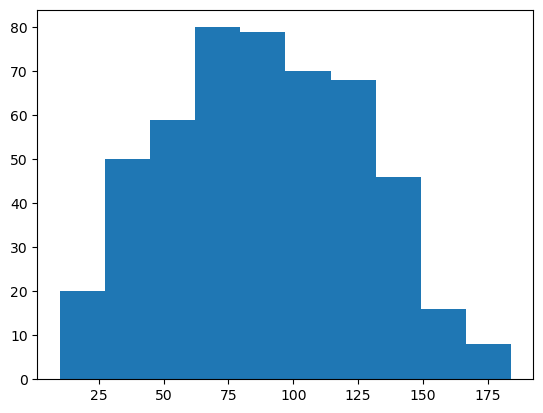

In [12]:
minimum_distances = [0] * len(index_pairs)
point_pair_indices = [0] * len(index_pairs)

counter = 0
for i in distance_matrices:
    
    i_min_dist, i_pt_pair_idx = dmf.find_minimum_distance_and_points(i)
    
    minimum_distances[counter] = i_min_dist
    point_pair_indices[counter] = point_pair_indices
    
    counter += 1
    
plt.hist(minimum_distances)
plt.show()